In [2]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

In [3]:
class Compartment:
    def __init__(self, MTTF, Duty_Cycle,MTTR,question): # αρχικοποίηση της κλάσης
        # έχουμε δωσμένα MTTR, Duty Cycle και MTTR
        # ορ΄ίζω και το αν λειτουργεί ή όχι ως μεταβλητή για να μας βοηθήσει μετά
        # και για το αν έχουμε ή όχι επιδιόρθωση το διαχωρίζουμε ανάλογα με το ερώτημα
        self.MTTF = MTTF
        self.Duty_Cycle = Duty_Cycle
        self.MTTR = MTTR
        self.is_working=1
        self.question=question
    
    # στην αρχή κάθε ώρας γίνεται refresh δηλα΄δή
    # μπορεί να πάθει βλάβη ή να επιδιορθωθεί
    def refresh(self):
        # 1/MTTF πιθανότητα αν λειτουργεί για να πάθει βλάβη
        if ( np.random.randint(self.MTTF)==0 and self.is_working==1):
            self.is_working=0
        # 1/MTTR πιθανότητα αν έχει βλάβη να επιδιορθωθεί
        if ( np.random.randint(self.MTTR)==0 and self.is_working==0 and self.question==2):
            self.is_working=1
        # γίνονται με αυτή τη σειρά διότι μπορεί αν υπάρξει βλάβη να επιδιορθωθεί άμεσα

# θα χρειαστεί για να έχουμε χρώματα στο plot
# διαβάζουμε σειριακά και αν λειτουργεί έχει μαύρο χρώμα
# ενώ αν έχει βλάβη έχει κόκκινο χρώμα
def match_colors(comp_working):
    colors=[]
    for i in range(0,1500):
        if (comp_working[i]>0):
            colors.append('black')
        else:
            colors.append('red')  
    return colors

In [4]:
# ορίζουμε τα 5 εξαρτήματα για το πρώτο ερώτημα
C1=Compartment(37,0.7,10,1)
C2=Compartment(20,1,10,1)
C3=Compartment(20,1,10,1)
C4=Compartment(20,1,10,1)
C5=Compartment(37,0.7,10,1)

In [5]:
# έχουμε να δουλέψουμε σε 150 ώρες όμως θα χρειαστεί για το duty cycle το 0.7
# οπότε έχουμε βήμα 0.1 
time=np.arange(0,150,0.1)
# τύπος αξιοπιστίας
C1Reliability=np.exp(-time*C1.Duty_Cycle*(1/C1.MTTF))
p1=C1Reliability
C2Reliability=np.exp(-time*C2.Duty_Cycle*(1/C2.MTTF))
p2=C2Reliability

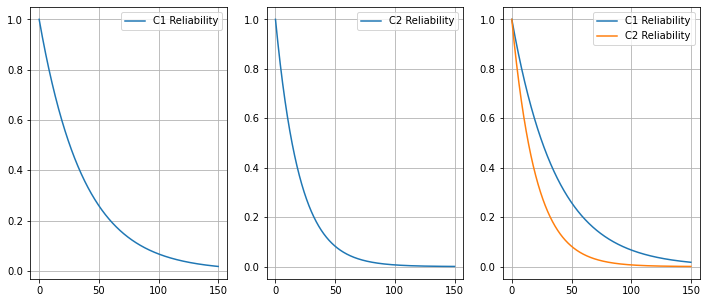

In [6]:
# plots
fig , ax = plt.subplots(1,3,figsize=(12,5) )
ax[0].plot(time,p1,label='C1 Reliability')
ax[0].grid()
ax[0].legend()


ax[1].plot(time,p2,label='C2 Reliability')
ax[1].grid()
ax[1].legend()


ax[2].plot(time,p1,label='C1 Reliability')
ax[2].plot(time,p2,label='C2 Reliability')
ax[2].grid()
ax[2].legend()

plt.show()

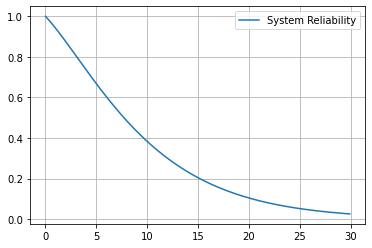

In [7]:
# τύπος για την αξιοπιστία του συστήματος 
# έχουμε στην σειρά c1,c5 και 2/3G c2,3,4 
systemp=(p1*(3*p2**2-2*p2**3)*p1)
plt.plot(time[:300],systemp[:300],label='System Reliability')
plt.grid()
plt.legend()
plt.show()

In [8]:
# τρέχουμε 1000 επαναλήψεις για να μετρήσουμε τα πειραματικά μεγέθη
index1=np.zeros(1000)
for j in range(0,1000):
    # στην αρχή κάθε επανάληψης ορίζουμε ξανά το εξάρτημα
    # διότι το πειράζουμε μέσα στην επανάληψη
    C1=Compartment(37,0.7,10,1)
    # σύμβαση ότι δεν ξεκινάμε από το 0
    for i in range(1,time.shape[0]):
        # η αρχή κάθε ώρας είναι τα i που είναι πολλαπλάσια του 10
        # δηλαδή 0 , 10 , 20 κλπ και τότε γίνεται refresh το εξάρτημα
        if (   round( i%10 , 2) ==0 ):
            C1.refresh()
        # αν πάθει βλάβη κρατάμε σε ποιά χρονική στιγμή έπαθε την βλάβη και έπειτα 
        # αφού δεν έχουμε επιδιόρθωση κάνουμε break για να τελειώσει το loop
        if (C1.is_working==0):
            index1[j]=i/10
            break
            
# print το MTTF
print('For compartment C1: Mean MTTF=',index1.mean(),'hours.')

# όμοια για το άλλο εξάρτημα
index2=np.zeros(1000)
for j in range(0,1000):
    C2=Compartment(20,1,10,1)
    for i in range(2,time.shape[0]):
        if (   round( i % 10 , 2) ==0 ):
            C2.refresh()
        if (C2.is_working==0):
            index2[j]=i/10
            break
            
print('For compartment C2: Mean MTTF=',index2.mean(),'hours.')

For compartment C1: Mean MTTF= 33.49 hours.
For compartment C2: Mean MTTF= 20.035 hours.


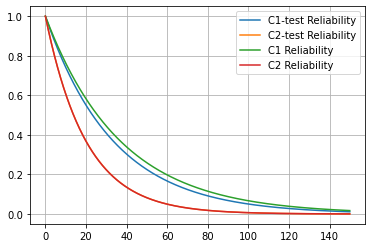

In [9]:
# όπως πριν ορίζουμε την συνάρτηση αξιοπιστίας 
# και την κάνουμε plot
l1=index1.mean()
l2=index2.mean()
p1t=np.exp(-time/l1)
p2t=np.exp(-time/l2)
plt.plot(time,p1t,label='C1-test Reliability')
plt.plot(time,p2t,label='C2-test Reliability')
plt.plot(time,p1,label='C1 Reliability')
plt.plot(time,p2,label='C2 Reliability')
plt.legend()
plt.grid()
plt.show()

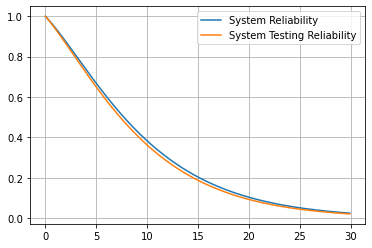

Formula:System MTTF= 10.44705882352941 
	 System Testing MTTF= 9.870382474808151


In [10]:
# το ίδιο και για το σύστημα
systempt=(p1t*(3*p2t**2-2*p2t**3)*p1t)
plt.plot(time[:300],systemp[:300],label='System Reliability')
plt.plot(time[:300],systempt[:300],label='System Testing Reliability')
plt.legend()
plt.grid()
plt.show()
print('Formula:System MTTF=',1/(5/6/C2.MTTF + 2/C1.MTTF) ,'\n\t System Testing MTTF=' , 1/(5/6/l2+2/l1) )

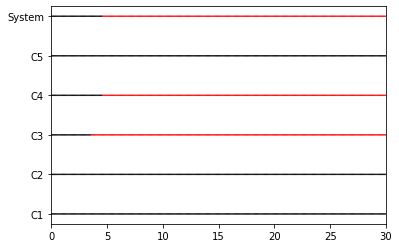

In [11]:
C1=Compartment(37,0.7,10,1)
C2=Compartment(20,1,10,1)
C3=Compartment(20,1,10,1)
C4=Compartment(20,1,10,1)
C5=Compartment(37,0.7,10,1)
# ορίζουμε πίνακα για το κάθε εξάρτημα που κάθε χρονική στιγμή μας λέει αν έχει βλάβη ή όχι
# 1 αν δεν έχει βλάβη(δηλαδή λειτουργεί) 0 αν έχει βλάβη και δεν λειτουργεί
# δίνουμε διαφορετικές τιμές στο καθένα για να ξεχωρίζουν στο plot
working=np.ones(1500)*0.9
C1_working=np.ones(1500)*0.15
C2_working=np.ones(1500)*0.3
C3_working=np.ones(1500)*0.45
C4_working=np.ones(1500)*0.6
C5_working=np.ones(1500)*0.75


for i in range(0,time.shape[0]):
    # όμοια με πριν στην αρχή κάθε ώρας γίνεται refresh
    if (   round( i % 10 , 2) ==0 ):
        C1.refresh()
        C2.refresh()
        C3.refresh()
        C4.refresh()
        C5.refresh()
        # αν πάθει βλάβη περιμένουμε 0.7 ώρες
        if (C1.is_working==0):
            C1_working[i+6:]=0

        if (C5.is_working==0):
            C5_working[i+6:]=0
            
        if (C2.is_working==0):
            C2_working[i+6:]=0

        if (C3.is_working==0):
            C3_working[i+6:]=0

        if (C4.is_working==0):
            C4_working[i+6:]=0
    # αν C1 ή C5 δεν λειτουργούν ή αν 2 από τα  C2,C3,C4 δεν λειτουργούν τότε το σύστημα δεν λειτουργεί
    # μηδενίζουμε τον πίνακα και έπειτα break 
    if ( (C1.is_working and C5.is_working and (C2.is_working+C3.is_working+C4.is_working>1) ) != 1 ):
        working[i+6:]=0
        break

# η συνάρτηση για να γίνουν plot σωστά τα χρώματα 
C1_colors=match_colors(C1_working)
C2_colors=match_colors(C2_working)
C3_colors=match_colors(C3_working)
C4_colors=match_colors(C4_working)
C5_colors=match_colors(C5_working)
system_colors=match_colors(working)

#plot
plt.scatter(time,np.ones(1500)*0.15,color=C1_colors,s=0.3)
plt.scatter(time,np.ones(1500)*0.3,color=C2_colors,s=0.3)
plt.scatter(time,np.ones(1500)*0.45,color=C3_colors,s=0.3)
plt.scatter(time,np.ones(1500)*0.6,color=C4_colors,s=0.3)
plt.scatter(time,np.ones(1500)*0.75,color=C5_colors,s=0.3)
plt.scatter(time,np.ones(1500)*0.9,color=system_colors,s=0.3)

# ticks στον y άξονα για να ξέρουμε ποιό είναι το κάθε εξάρτημα
plt.yticks(ticks=[0.15,0.3,0.45,0.6,0.75,0.9],labels=['C1','C2','C3','C4','C5','System'])
# μελετάμε το σύστημα για 30 ώρες
plt.xlim(0,30)
plt.show()

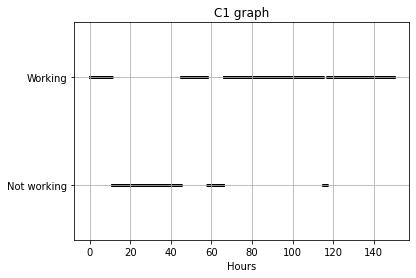

In [12]:
# θα μελετήσουμε τα εξαρτήματα στον χρόνο με επιδιόρθωση
C1=Compartment(37,0.7,10,2)
C2=Compartment(20,1,10,2)
C1_working=np.ones(1500)
C2_working=np.ones(1500)
for i in range(0,time.shape[0]):
    # στην αρχή κάθε ώρας refresh
    if (   round( i % 10 , 2) ==0 ):
        C1.refresh()
        C2.refresh()
    # πολ/ζω για να βγει ωραίο το plot
    C1_working[i]=C1.is_working*0.1
    C2_working[i]=C2.is_working*0.1
    
# plot
plt.scatter(time,C1_working,s=3,color='black')
# για λόγους ομοιόμορφης εμφάνισης
plt.ylim(-0.05,0.15)
# δίνουμε ονόμα στον άξονα y
plt.yticks(ticks=[0,0.1],labels=['Not working','Working'])
plt.xlabel('Hours')
plt.title('C1 graph')
plt.grid()
plt.show()

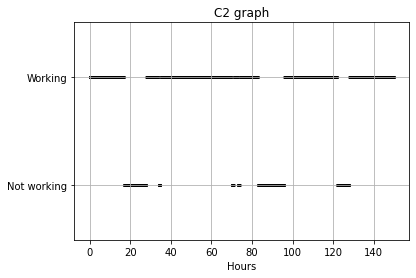

In [13]:
plt.scatter(time,C2_working,s=3,color='black')
plt.ylim(-0.05,0.15)
plt.yticks(ticks=[0,0.1],labels=['Not working','Working'])
plt.xlabel('Hours')
plt.grid()
plt.title('C2 graph')
plt.show()

In [14]:
# θα τρέξουμε 100 επαναλήψεις για να υπολογίσουμε πειραματικές τιμές των μεγεθών
MTBF=np.zeros(100)
MUT=np.zeros(100)
Av=np.zeros(100)
MTR=np.zeros(100)
for j in range(0,100):
    C1=Compartment(37,0.7,10,2)
    # counter για πόσες φορές έπαθε βλάβη
    counter=0
    C1_working=np.ones(time.shape[0])
    for i in range(0,time.shape[0]):
        if (   round( i%10 , 2) ==0 ):
            # κρατάμε την κατάσταση του εξαρτήματος πριν και μετά το refresh
            temp1=C1.is_working
            C1.refresh()
            temp2=C1.is_working
            # αν λειτουργούσε και έπαθε βλάβη τότε αυξάνουμε τον counter
            if (temp1==1 and temp2==0):
                counter +=1
        # έχουμε αρχικοποιήσει με 1 οπότε δεν δίνουμε τιμή 1 όταν δεν έχει βλάβη
        # όταν έχει βλάβη του δίνουμε τιμή 0
        if (C1.is_working==0):
            C1_working[i]=0
    # mean up time ορίζεται ως η περίοδος σωστής λειτουργίας
    MU=(np.where(C1_working==1))[0].shape[0]
    # mean down time ορίζεται ως η περίοδος με βλάβη
    # δηλαδή από τις 150 ώρες αφαιρώ αυτές της καλής λειτουργίας 
    MD=1500-MU
    # τύπος διαθεσιμότητας
    A=MU/(MD+MU)
    # διαιρώ με 10 λόγω του step
    MUT[j]=MU/10
    Av[j]=A
    # αν δεν έχει πάθει βλάβη τότε MTBF θεωρούμε 0 το ίδιο και MTTR
    if (counter==0):
        MTBF[j]=0
        MTR[j]=0
    # αν έχει πάθει βλάβη
    else:
        # MTBF ορίζεται ως οι ώρες καλής λειτουργίας προς πόσες φορές είχαμε βλάβη
        MTBF[j]=MU/counter/10
        # MTTR ορίζεται ως οι ώρες με βλάβη προς πόσες φορές είχαμε βλάβη
        MTR[j]=MD/10/counter
        
# με μέθοδο των τριών : στις 47 ώρες οι 37 είναι καλής λειτουργίας
#                       στις 150 ώρες x
uptime=150*C1.MTTF/(C1.MTTF+C1.MTTR)
downtime=150-uptime
print('Testing MTBF:',MTBF.mean() ,'\nTesting MUT:', MUT.mean() ,
      '\nTesting Availability:' ,Av.mean(),'\nTesting MTTR:' ,MTR.mean())
print('\nFormula MTBF:',C1.MTTR+C1.MTTF ,'\nFormula MUT:', uptime ,
      '\nFormula Availability:' ,uptime/150,'\nFormula MTTR:' ,C1.MTTR )

Testing MTBF: 49.61509523809523 
Testing MUT: 122.69 
Testing Availability: 0.8179333333333332 
Testing MTTR: 8.924190476190477

Formula MTBF: 47 
Formula MUT: 118.08510638297872 
Formula Availability: 0.7872340425531915 
Formula MTTR: 10


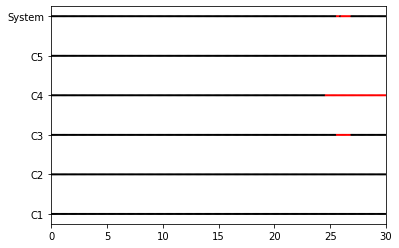

In [15]:
# παρόμοια διαδικασία με το πρώτο μ΄έρος αλλά τώρα έχουμε επιδιόρθωση
C1=Compartment(37,0.7,10,2)
C2=Compartment(20,1,10,2)
C3=Compartment(20,1,10,2)
C4=Compartment(20,1,10,2)
C5=Compartment(37,0.7,10,2)
working=np.ones(1500)*0.9
C1_working=np.ones(1500)
C2_working=np.ones(1500)
C3_working=np.ones(1500)
C4_working=np.ones(1500)
C5_working=np.ones(1500)


for i in range(0,time.shape[0]):
    if (   round( i % 10 , 2) ==0 ):
        # πάλι θέλουμε να γνωρίζουμε αν το εξάρτημα έχει αυτή τη χρονική βλάβη
        # εάν συνέβη τώρα ή αν υπήρχε από πριν
        C1_temp=C1.is_working
        C1.refresh()
        C2_temp=C2.is_working
        C2.refresh()
        C3_temp=C3.is_working
        C3.refresh()
        C4_temp=C4.is_working
        C4.refresh()
        C5_temp=C5.is_working 
        C5.refresh()
        
        # αν έχει βλάβη
        if (C1.is_working==0):
            # αν συνέβη τ΄ώρα τότε περιμένουμε duty cycle ώρες για να το θέσουμε εκτός λειτουργίας
            if(C1_temp==1):
                C1_working[i+6:i+9]=0
            # αν είχε ήδη βλάβη τότε είναι ακόμα εκτός λειτουργίας
            else:
                C1_working[i-1:i+9]=0
                
        if (C2.is_working==0):
            if(C2_temp==1):
                C2_working[i+6:i+9]=0
            else:
                C2_working[i-1:i+9]=0
                
        if (C3.is_working==0):
            if(C3_temp==1):
                C3_working[i+6:i+9]=0
            else:
                C3_working[i-1:i+9]=0
                
        if (C4.is_working==0):
            if(C4_temp==1):
                C4_working[i+6:i+9]=0
            else:
                C4_working[i-1:i+9]=0

        if (C5.is_working==0):
            if(C5_temp==1):
                C5_working[i+6:i+9]=0
            else:
                C5_working[i-1:i+9]=0

    # σε αντίθεση με πριν τώρα εξετάζουμε κάθε χρονική στιγμή δηλαδή 0.1 της ώρας
    # λόγω του δεκαδικού duty cycle
    if ( (C1_working[i] and C5_working[i] and (C2_working[i]+C3_working[i]+C4_working[i]  >1) ) != 1 ):
        working[i]=0        

# πολ/ζω για το plot
C1_working*=0.15
C2_working*=0.3
C3_working*=0.45
C4_working*=0.6
C5_working*=0.75

C1_colors=match_colors(C1_working)
C2_colors=match_colors(C2_working)
C3_colors=match_colors(C3_working)
C4_colors=match_colors(C4_working)
C5_colors=match_colors(C5_working)
system_colors=match_colors(working)

plt.scatter(time,np.ones(1500)*0.15,color=C1_colors,s=1)
plt.scatter(time,np.ones(1500)*0.3,color=C2_colors,s=1)
plt.scatter(time,np.ones(1500)*0.45,color=C3_colors,s=1)
plt.scatter(time,np.ones(1500)*0.6,color=C4_colors,s=1)
plt.scatter(time,np.ones(1500)*0.75,color=C5_colors,s=1)
plt.scatter(time,np.ones(1500)*0.9,color=system_colors,s=1)

plt.yticks(ticks=[0.15,0.3,0.45,0.6,0.75,0.9],labels=['C1','C2','C3','C4','C5','System'])
plt.xlim(0,30)
plt.show()